# Tests vs FPs vs FNs

In this notebook we plot the resulting combinations of Tests, FPs and FNs for various combinations of lambdas.

In [1]:
import os
os.chdir("../")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('default')
import seaborn as sns
import glob
import json
from src import utils
sns.set_theme(context='paper', style='dark', font_scale=4)

In [3]:
name="tests_FP_FN"
type_dict = {
    'days' : int,
    'false_negatives' : int,
    'false_positives' : int,
    'k' : float,
    'lambda_1' : float,
    'lambda_2' : float,
    'method' : str,
    'num_of_infected' : int,
    'num_of_tests' : int,
    'r' : float,
    'score' : float,
    'se' : float,
    'sp' : float,
    'seed' : int
}

In [4]:
files = glob.glob("./outputs/{name}_*.json".format(name=name))
# final_df = pd.DataFrame()
data = []
for fl_id, fl in enumerate(files):
    with open(fl,"r") as f:
        # df = pd.DataFrame.from_records(json.load(f), index=[fl_id])
        df = pd.DataFrame.from_records([json.load(f)])
        data.append(df)

input_df = pd.concat(data)

In [16]:
input_df

,lambda_1,lambda_2,se,sp,r,k,method,score,num_of_tests,false_negatives,false_positives,num_of_infected,seed,days
0,0.0,0.0,0.7,0.95,0.6,0.1,negbin,17.0,17,2,0,2,269,7
0,0.5,0.5,0.7,0.95,0.6,0.1,dorfman,0.0,22,0,0,0,239,7
0,0.4,0.2,0.7,0.95,0.6,0.1,dorfman,3.9999999999999996,10,0,0,0,87,7
0,0.1,0.4,0.7,0.95,0.6,0.1,dorfman,3.6,7,1,0,2,217,7
0,0.2,0.6,0.7,0.95,0.6,0.1,individual,11.000000000000002,49,0,2,0,228,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.1,0.3,0.7,0.95,0.6,0.1,dorfman,8.700000000000003,14,0,1,0,297,7
0,0.3,0.6,0.7,0.95,0.6,0.1,negbin,0.4999999999999999,5,0,0,0,457,7
0,0.1,0.1,0.7,0.95,0.6,0.1,individual,28.2,35,0,2,0,322,7
0,1.0,0.0,0.7,0.95,0.6,0.1,individual,2.0,9,2,0,3,118,7


In [22]:
final_df = input_df.astype(type_dict) # Fix types
final_df = final_df.rename(columns={"method": "Method", "score": "Score"}) # Rename columns
final_df = final_df.replace({'dorfman': 'Dorfman', 'individual': 'Individual', 'negbin': 'Neg.Bin.'}) # Rename methods
final_df = final_df[final_df['Method']=='Dorfman']

In [23]:
l1_values = sorted(final_df['lambda_1'].unique())
l2_values = sorted(final_df['lambda_2'].unique())
data = []
for l1 in l1_values:
    for l2 in l2_values:
        temp_df = final_df[(final_df['lambda_1']==l1) & (final_df['lambda_2']==l2)]
        # mean_false_negatives = temp_df['false_negatives'].mean()
        # mean_false_positives = temp_df['false_positives'].mean()
        # mean_num_of_tests = temp_df['num_of_tests'].mean()
        temp_df = pd.DataFrame.from_dict({'\\# of False Negatives' : [mean_false_negatives], '\\# of False Positives' : [mean_false_positives], '\\# of Tests' : mean_num_of_tests})
        data.append(temp_df)

final_df = pd.concat(data)

In [24]:
final_df[:20]

,\# of False Negatives,\# of False Positives,\# of Tests
0,0.218,0.854,20.326
0,0.214,0.864,20.272
0,0.220,0.850,20.178
0,0.220,0.844,20.100
0,0.216,0.834,20.034
0,0.216,0.828,19.850
0,0.216,0.830,19.684
0,0.224,0.808,19.306
0,0.212,0.766,19.204
0,0.222,0.730,18.890


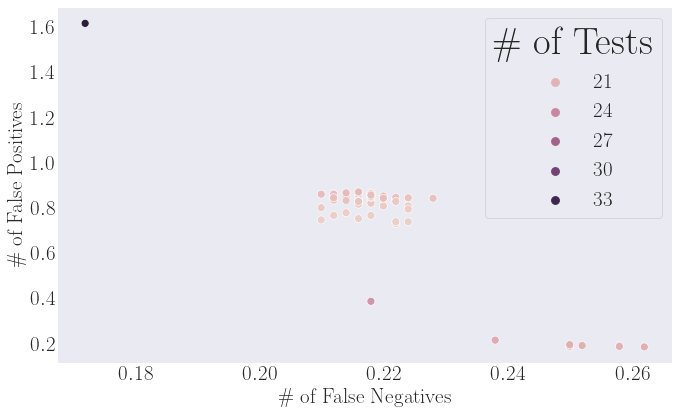

In [25]:
utils.latexify(fig_width=10, font_scale=3)
# N_values = sorted(final_df['N'].unique())
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.contour.html
ax = sns.scatterplot(data=final_df, x="\\# of False Negatives", y="\\# of False Positives", hue="\\# of Tests")
# ax = sns.heatmap(data=final_df, cmap='flare', linewidths=0.05)
# ax = sns.lineplot(data=final_df, x="N", y="Score", hue="Method", palette='deep', style="Method", markers=marker_dict,
                    # dashes=None, legend=None, ci=95)
# ax.set_xticks(N_values)
# ax.set_xticklabels(N_values)
# ax.legend(['Individual', 'Dorfman', 'Neg.Bin.'])
plt.tight_layout()
plt.savefig('figures/{name}.pdf'.format(name=name))